In [ ]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

import xgboost as xgb
import seaborn as sns

In [ ]:

data = pd.read_csv('heartdisease.csv')
data.head()


,age,sex,pain,BP,chol,fbs,ecg,maxhr,eiang,eist,slope,vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
data.shape

(297, 14)

In [ ]:
data.describe()

,age,sex,pain,BP,chol,fbs,ecg,maxhr,eiang,eist,slope,vessels,thal,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    float64
 1   sex        297 non-null    float64
 2   pain       297 non-null    float64
 3   BP         297 non-null    float64
 4   chol       297 non-null    float64
 5   fbs        297 non-null    float64
 6   ecg        297 non-null    float64
 7   maxhr      297 non-null    float64
 8   eiang      297 non-null    float64
 9   eist       297 non-null    float64
 10  slope      297 non-null    float64
 11  vessels    297 non-null    float64
 12  thal       297 non-null    float64
 13  diagnosis  297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


In [ ]:
data.diagnosis.value_counts()

0    160
1     54
3     35
2     35
4     13
Name: diagnosis, dtype: int64

In [ ]:
# Checking for messing values
data.isna().sum()

age          0
sex          0
pain         0
BP           0
chol         0
fbs          0
ecg          0
maxhr        0
eiang        0
eist         0
slope        0
vessels      0
thal         0
diagnosis    0
dtype: int64

Plots

In [ ]:
# bg_color = (0.25, 0.25, 0.25)
# sns.set(rc={"font.style":"normal",
#             "axes.facecolor":bg_color,
#             "figure.facecolor":bg_color,
#             "text.color":"white",
#             "xtick.color":"white",
#             "ytick.color":"white",
#             "axes.labelcolor":"white",
#             "axes.grid":False,
#             'axes.labelsize':25,
#             'figure.figsize':(10.0,5.0),
#             'xtick.labelsize':15,
#             'ytick.labelsize':15}) 

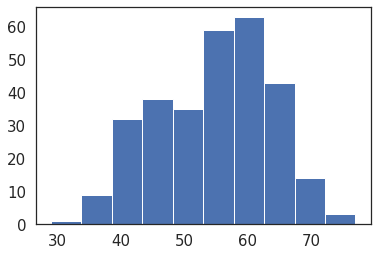

In [ ]:
data['age'].hist(grid=False)

Majority of the people get a heart attack around the age of 55-60

[<matplotlib.patches.Rectangle object at 0x7f5a130267f0>, <matplotlib.patches.Rectangle object at 0x7f5a130265c0>, <matplotlib.patches.Rectangle object at 0x7f5a13026eb8>, <matplotlib.patches.Rectangle object at 0x7f5a130265f8>, <matplotlib.patches.Rectangle object at 0x7f5a1303c128>, <matplotlib.patches.Rectangle object at 0x7f5a130266d8>, <matplotlib.patches.Rectangle object at 0x7f5a1303cd68>, <matplotlib.patches.Rectangle object at 0x7f5a130267b8>]


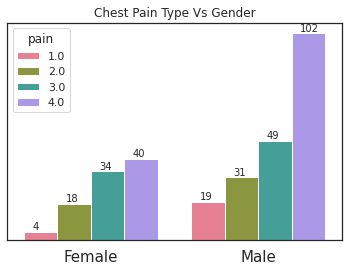

In [ ]:
# do a gender comparison 
ax = sns.countplot(hue=data.pain,x='sex',data=data,palette='husl')

plt.title("Chest Pain Type Vs Gender")    
plt.ylabel("")
plt.yticks([])
plt.xlabel("")
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.05, p.get_height()+1))
ax.set_xticklabels(['Female','Male'])
print(ax.patches)

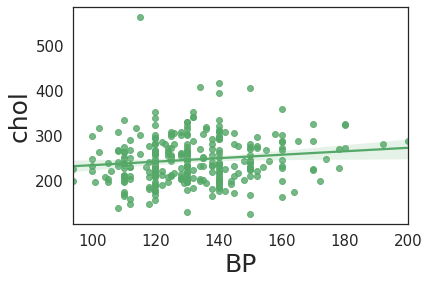

In [ ]:
#check if bp and cholestrol are correlated
ax = sns.regplot(x='BP', y='chol',data=data, color="g")

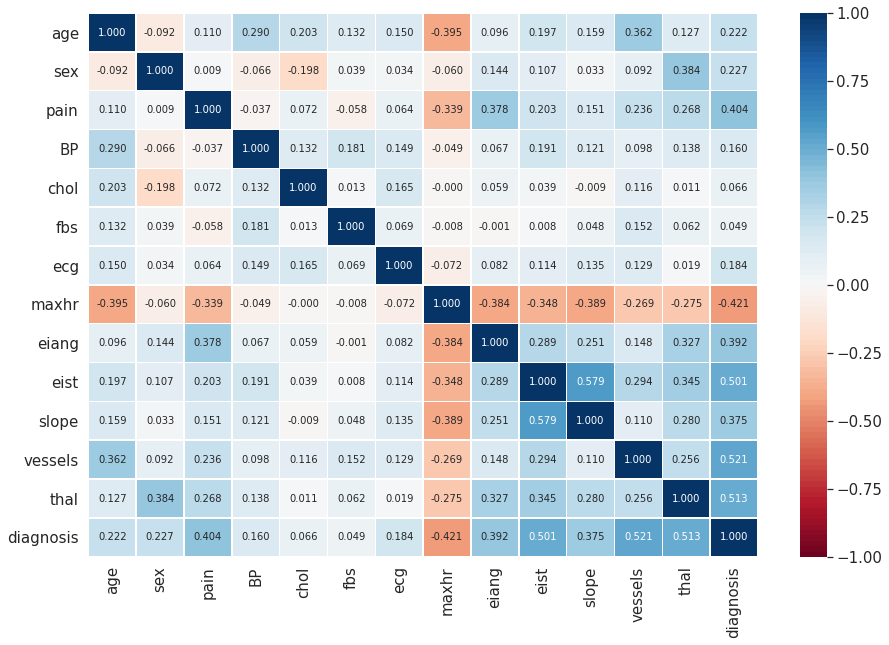

In [ ]:
#correlation matrix
num_corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(num_corr, annot=True, fmt=".3f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.color_palette("RdBu", 100))
plt.yticks(rotation=0)
plt.show()

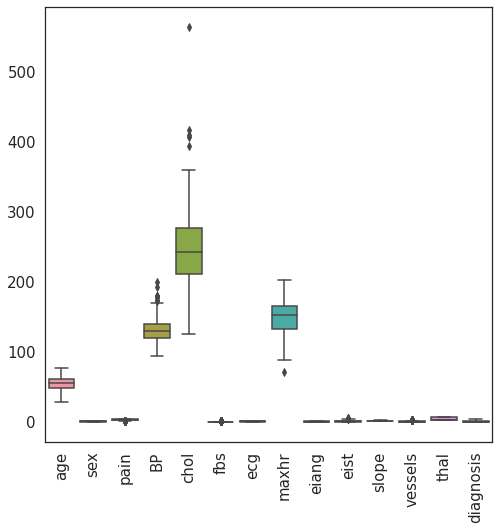

In [ ]:
# display boxlots
plt.figure(figsize=(8,8))
sns.set_style("white")
sns.boxplot( data=data)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from scipy import stats
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data

,age,sex,pain,BP,chol,fbs,ecg,maxhr,eiang,eist,slope,vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [ ]:
# Check for outliers using boxplots and drop them
cols = list(data.columns)

for num_attr in cols:
    # Getting 75 and 25 percentile of variable "i"
    Q3, Q1 = np.percentile(data[num_attr], [75,25])
    MEAN = data[num_attr].mean()
    
    # Calculating Interquartile range
    IQR = Q3 - Q1
    
    # Calculating upper extream and lower extream
    minimum = Q1 - (IQR*1.5)
    maximum = Q3 + (IQR*1.5)
    
    # Replacing all the outliers value to Mean
    data_clean=data.drop(data.loc[data[num_attr]< minimum,num_attr].index) 
    data_clean=data.drop(data.loc[data[num_attr]> maximum,num_attr].index)

In [ ]:
print(len(data_clean),len(data))

297 297


['age',
 'sex',
 'pain',
 'BP',
 'chol',
 'fbs',
 'ecg',
 'maxhr',
 'eiang',
 'eist',
 'slope',
 'vessels',
 'thal',
 'diagnosis']

making models

In [ ]:
y = data["diagnosis"]
X = data.drop('diagnosis',axis=1)
#split after somte

check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [ ]:
print(y.unique())
Counter(y)

#so here there might be data imbalancing problem

#Try Resampling the Dataset
#since the no of records is less => go for over sampling
#smote

[0 2 1 3 4]


Counter({0: 157, 1: 53, 2: 33, 3: 32, 4: 11})

same can be seen using the plot below

Text(0, 0.5, 'Frequency')

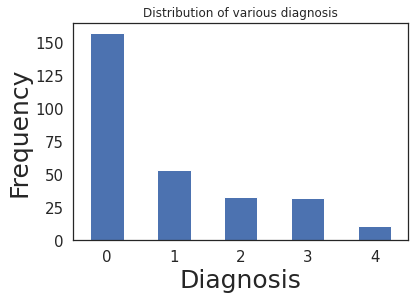

In [ ]:
count_classes = pd.value_counts(data['diagnosis'],sort =True)
count_classes.plot(kind = 'bar', rot=0)

plt.title("Distribution of various diagnosis")
lables = list(range(5))
plt.xticks(lables)

plt.xlabel("Diagnosis")
plt.ylabel("Frequency")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

smotetomek


In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
smk = SMOTETomek(random_state=42)
X_train_res,y_train_res=smk.fit_sample(X_train,y_train)







/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 128, 1: 42, 3: 27, 2: 24, 4: 7})
Resampled dataset shape Counter({4: 125, 3: 123, 2: 121, 1: 118, 0: 113})


In [ ]:
X_train_res.shape,y_train_res.shape

((600, 13), (600,))

In [ ]:
X_train_res.shape, X_test.shape, y_train_res.shape, y_test.shape

((600, 13), (58, 13), (600,), (58,))

Text(0, 0.5, 'Frequency')

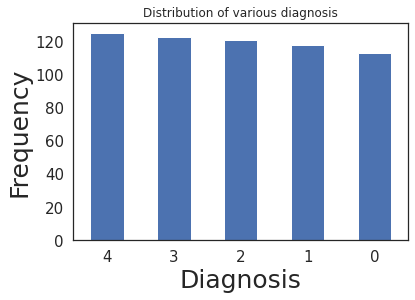

In [ ]:
#after oversampling
count_classes = pd.value_counts(y_train_res,sort =True)
count_classes.plot(kind = 'bar', rot=0)

plt.title("Distribution of various diagnosis")
lables = list(range(5))
plt.xticks(lables)

plt.xlabel("Diagnosis")
plt.ylabel("Frequency")

pandas profiling

Naive bayes

In [ ]:
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train_res,y_train_res)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[24  4  0  1  0]
 [ 3  4  1  2  1]
 [ 0  3  1  3  2]
 [ 0  1  1  2  1]
 [ 0  1  0  3  0]]


Accuracy of Naive Bayes model: 53.44827586206896 

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.31      0.36      0.33        11
           2       0.33      0.11      0.17         9
           3       0.18      0.40      0.25         5
           4       0.00      0.00      0.00         4

    accuracy                           0.53        58
   macro avg       0.34      0.34      0.32        58
weighted avg       0.57      0.53      0.54        58



In [ ]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, nbpred)*100)

Gaussian Naive Bayes model accuracy(in %): 55.00000000000001


knn

In [ ]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_res, y_train_res)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[29  5  2  0  0]
 [ 1  4  2  2  0]
 [ 0  1  2  2  0]
 [ 0  1  1  3  2]
 [ 0  3  0  0  0]]


Accuracy of K-NeighborsClassifier: 63.33333333333333 

              precision    recall  f1-score   support

           0       0.97      0.81      0.88        36
           1       0.29      0.44      0.35         9
           2       0.29      0.40      0.33         5
           3       0.43      0.43      0.43         7
           4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.39      0.42      0.40        60
weighted avg       0.70      0.63      0.66        60



In [ ]:
import scikitplot as skplt
skplt.metrics.plot_roc_curve(y_test, nbpred)
roc_curve(y_test,knn_predicted)


# sns.set_style('whitegrid')
# plt.figure(figsize=(10,5))
# plt.title('Reciver Operating Characterstic Curve')

# plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')

# plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')

# plt.plot([0,1],ls='--')
# plt.plot([0,0],[1,0],c='.5')
# plt.plot([1,1],c='.5')
# plt.ylabel('True positive rate')
# plt.xlabel('False positive rate')
# plt.legend()
# plt.show()


ModuleNotFoundError: ignored